# Laboratorio 2

## 1. Carga de datos
##### Se importan todas las librerias necesarias para poder crear, entrenar y crear el modelo

In [1]:
import numpy as np
import pandas as pd

from joblib import dump, load

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from abc import ABC, abstractmethod
from sklearn.base import BaseEstimator, TransformerMixin

import scipy.stats as stats

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

In [2]:
df = pd.read_csv('./data/MotorAlpes_data.csv', index_col=False)
df = df.iloc[:, 1:]
og_df = df.copy()

## 2. Descripción de los datos
##### Se hace una descripcion de los datos para poder entender con que tipo de datos estamos trabajando y elementos que importantes que toque tener en cuenta 

In [3]:
df.shape

(7115, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7115 entries, 0 to 7114
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           6876 non-null   float64
 1   km_driven      6917 non-null   float64
 2   owner          6876 non-null   object 
 3   seller_type    7115 non-null   object 
 4   seats          7115 non-null   float64
 5   fuel           7115 non-null   object 
 6   transmission   7115 non-null   object 
 7   mileage        6917 non-null   float64
 8   engine         6835 non-null   float64
 9   max_power      6847 non-null   float64
 10  selling_price  6714 non-null   float64
dtypes: float64(7), object(4)
memory usage: 611.6+ KB


In [5]:
df.describe()

,year,km_driven,seats,mileage,engine,max_power,selling_price
count,6876.000000,6.917000e+03,7115.000000,6917.000000,6835.000000,6847.000000,6714.000000
mean,2013.980948,6.911118e+04,5.411103,19.523473,1835.489539,141.981595,11261.208041
std,3.852565,5.796521e+04,0.953555,4.241574,2363.919253,274.956684,40765.694516
min,1994.000000,1.000000e+00,2.000000,0.000000,4.000000,1.070000,1.910000
25%,2012.000000,3.400000e+04,5.000000,16.800000,1197.000000,68.050000,3210.560000
50%,2015.000000,6.000000e+04,5.000000,19.330000,1248.000000,83.100000,5451.900000
75%,2017.000000,9.400000e+04,5.000000,22.320000,1597.000000,104.680000,8480.740000
max,2020.000000,2.360457e+06,14.000000,46.816000,19972.000000,1995.640000,598983.440000


### 2.1 Completitud
##### Revision de datos faltantes y el porcentaje que representan

In [6]:
df.isnull().sum()    

year             239
km_driven        198
owner            239
seller_type        0
seats              0
fuel               0
transmission       0
mileage          198
engine           280
max_power        268
selling_price    401
dtype: int64

In [7]:
# Show null values as a percentage of the dataframe
df.isnull().sum() / df.shape[0]

year             0.033591
km_driven        0.027829
owner            0.033591
seller_type      0.000000
seats            0.000000
fuel             0.000000
transmission     0.000000
mileage          0.027829
engine           0.039353
max_power        0.037667
selling_price    0.056360
dtype: float64

### 2.2 Consistencia
##### Revision de que todos los datos que se encuentran dentro del dataframe cuamplan con las normas establecidas en el diccionario de datos

In [8]:
# check if year is between 1994 and 2020

print(all(map(lambda x: x in range(1994,2021), df["year"])))

False


In [9]:
# check if km_driven is between 1 and 2’360.457

print(all(map(lambda x: x in range(1,2360458), df["km_driven"])))

False


In [10]:
# check if owner is in ['First Owner', 'Second Owner', 'Third Owner', 'Fourth & Above Owner', 'Test Drive Car']

print(all(map(lambda x: x in ['First Owner', 'Second Owner', 'Third Owner', 'Fourth & Above Owner', 'Test Drive Car'], df["owner"])))

False


In [11]:
# check if seller_type is in ['Individual', 'Dealer', 'Trustmark Dealer']

print(all(map(lambda x: x in ['Individual', 'Dealer', 'Trustmark Dealer'], df["seller_type"])))

True


In [12]:
# check if seats is between 2 and 14

print(all(map(lambda x: x in range(2,15), df["seats"])))

True


In [13]:
# check if fuel is in ['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric']

print(all(map(lambda x: x in ['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], df["fuel"])))

True


In [14]:
# check if transmission is in ['Manual', 'Automatic']

print(all(map(lambda x: x in ['Manual', 'Automatic'], df["transmission"])))

True


In [15]:
# check if mileage is between 0 and 46.816

print(all(map(lambda x: 34.2 <= x <= 46.816, df["mileage"])))

False


In [16]:
# check if engine is between 624 and 3604

print(all(map(lambda x: x in range(624,3605), df["engine"])))

False


In [17]:
# check if max_power is between 34.2 and 400

print(all(map(lambda x: 32.8 <= x <= 400, df["max_power"])))

False


In [18]:
# check if selling_price is between 363.45 and 121153.38

print(all(map(lambda x: 363.45 <= x <= 121153.38, df["selling_price"])))

False


### 2.3 Consistencia
##### Revisar que todos los datos sean consistentes semanticamente, es decir, los atributos sean unicos y no tengan otros nombres

In [19]:
# for every categorical variable, check if there are values that are not in the list of possible values

categorical = ['owner', 'seller_type', 'fuel', 'transmission']

for col in categorical:
    print(col, df[col].unique())

owner [nan 'Second Owner' 'Third Owner' 'First Owner' 'Fourth & Above Owner'
 'Test Drive Car']
seller_type ['Individual' 'Dealer' 'Trustmark Dealer']
fuel ['Diesel' 'Petrol' 'LPG' 'CNG']
transmission ['Manual' 'Automatic']


## 3. Análisis Exploratorio

### 3.1 Preparación de los datos
##### Se deben preparar los datos para poderlos procesar. Esto incluye agregar nuevas columnas relevantes, llenar valores vacios con alguna metrica determinada y reemplazar los valores categoricos por representaciones numericas

In [20]:
# Set a column that specifies the age gap
df['antiquity'] = 2020 - df['year']

In [21]:
# Fill numerical values with the median so as not to skew the data
df = df.fillna(df.median())

/var/folders/7y/s678cmw965v15n9dxxzzvrjh0000gn/T/ipykernel_50383/1869067488.py:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.median())


In [22]:
# Fill categorical values with the mode
categorical_cols = ['owner', 'seller_type', 'fuel', 'transmission']
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [23]:
# Replace all the categorical values with numbers
df['owner'] = df['owner'].replace({'First Owner': 1, 'Second Owner': 2, 'Third Owner': 3, 'Fourth & Above Owner': 4, 'Test Drive Car': 5})
df['seller_type'] = df['seller_type'].replace({'Individual': 1, 'Dealer': 2, 'Trustmark Dealer': 3})
df['fuel'] = df['fuel'].replace({'Petrol': 1, 'Diesel': 2, 'CNG': 3, 'LPG': 4, 'Electric': 5})
df['transmission'] = df['transmission'].replace({'Manual': 1, 'Automatic': 2})

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7115 entries, 0 to 7114
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           7115 non-null   float64
 1   km_driven      7115 non-null   float64
 2   owner          7115 non-null   int64  
 3   seller_type    7115 non-null   int64  
 4   seats          7115 non-null   float64
 5   fuel           7115 non-null   int64  
 6   transmission   7115 non-null   int64  
 7   mileage        7115 non-null   float64
 8   engine         7115 non-null   float64
 9   max_power      7115 non-null   float64
 10  selling_price  7115 non-null   float64
 11  antiquity      7115 non-null   float64
dtypes: float64(8), int64(4)
memory usage: 667.2 KB


In [24]:
# Asumimos que el experto decidio que estos eran los features mas relevantes
features = ["antiquity", "km_driven", "seats", "fuel", "transmission", "max_power"]

In [25]:
# Make a scaler to normalize de data
scaler = StandardScaler()
x = df
y = df['selling_price']
features = ["antiquity", "km_driven", "seats", "fuel", "transmission", "max_power"]
x = scaler.fit_transform(x[features])

In [26]:
# Make a dataframe with the normalized data and keep the old one
df = pd.DataFrame(x, columns=features)
df['selling_price'] = y
df

,antiquity,km_driven,seats,fuel,transmission,max_power,selling_price
0,-0.259746,1.340640,-0.431157,0.809492,-0.392073,-0.243622,5451.90
1,0.004004,0.894590,-0.431157,0.809492,-0.392073,-0.134265,4482.68
2,2.113998,1.244433,-0.431157,-1.060487,-0.392073,-0.228804,1914.22
3,1.059001,1.017035,-0.431157,0.809492,-0.392073,-0.209911,2725.95
4,1.850249,0.894590,-0.431157,-1.060487,-0.392073,-0.191018,1574.99
...,...,...,...,...,...,...,...
7110,0.267753,0.719669,-0.431157,-1.060487,-0.392073,5.133130,3876.91
7111,1.850249,0.877098,-0.431157,0.809492,-0.392073,-0.110260,1635.57
7112,1.322750,0.894590,-0.431157,0.809492,-0.392073,-0.243992,4628.06
7113,0.267753,-0.767164,-0.431157,0.809492,-0.392073,-0.258440,3513.45


### 3.2 Visualización de los datos
##### Se visualizan los datos incialmente comparados contra el "selling_price" para ver tendencias y ayudar en la identificacion de features

In [27]:
#sns.pairplot(df)
#plt.show()

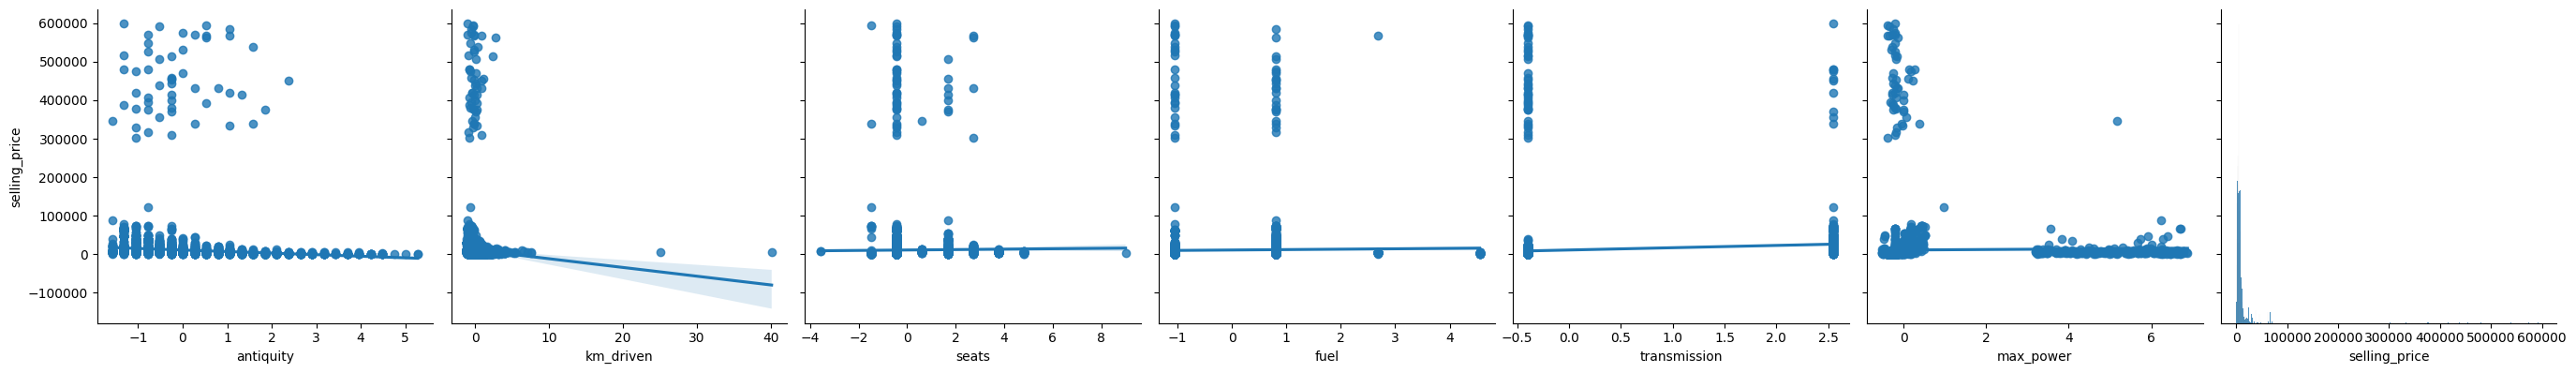

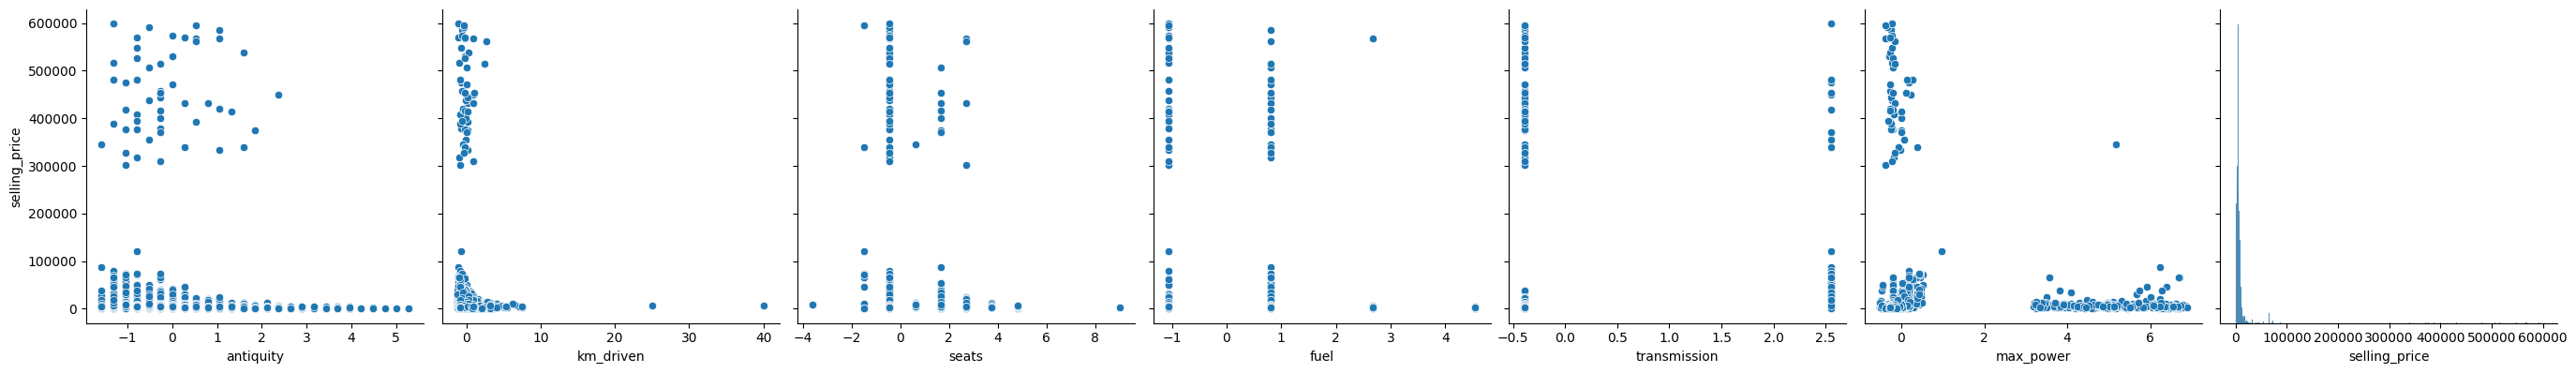

In [28]:
sns.pairplot(df, x_vars=list(df.columns), y_vars='selling_price', height=4, aspect=1, kind='reg')
sns.pairplot(df, x_vars=list(df.columns), y_vars='selling_price', height=4, aspect=1)

In [29]:
df[df.columns].corr()

,antiquity,km_driven,seats,fuel,transmission,max_power,selling_price
antiquity,1.000000,0.412650,0.013623,-0.018283,-0.239609,-0.053672,-0.102322
km_driven,0.412650,1.000000,0.224160,0.253972,-0.192115,-0.007598,-0.057280
seats,0.013623,0.224160,1.000000,0.305467,-0.073186,0.022073,0.013726
fuel,-0.018283,0.253972,0.305467,1.000000,-0.041470,0.037757,0.026568
transmission,-0.239609,-0.192115,-0.073186,-0.041470,1.000000,0.072900,0.149686
max_power,-0.053672,-0.007598,0.022073,0.037757,0.072900,1.000000,0.015804
selling_price,-0.102322,-0.057280,0.013726,0.026568,0.149686,0.015804,1.000000


In [30]:
# Correlation between features chosen
df[features].corr()

,antiquity,km_driven,seats,fuel,transmission,max_power
antiquity,1.000000,0.412650,0.013623,-0.018283,-0.239609,-0.053672
km_driven,0.412650,1.000000,0.224160,0.253972,-0.192115,-0.007598
seats,0.013623,0.224160,1.000000,0.305467,-0.073186,0.022073
fuel,-0.018283,0.253972,0.305467,1.000000,-0.041470,0.037757
transmission,-0.239609,-0.192115,-0.073186,-0.041470,1.000000,0.072900
max_power,-0.053672,-0.007598,0.022073,0.037757,0.072900,1.000000


## 4. Modelamiento
##### Se procede a relalizar el modelo de acuerdo al analisis exploratorio y atributos escogidos como mas relevantes para entrenar el modelo

In [31]:
x_train, x_test, y_train, y_test = train_test_split(df[features], df['selling_price'], test_size = 0.3, random_state = 1)

In [32]:
x_train

,antiquity,km_driven,seats,fuel,transmission,max_power
1839,1.850249,0.894590,1.666405,0.809492,-0.392073,-0.284371
1019,0.267753,1.856659,-0.431157,0.809492,-0.392073,-0.262144
6009,-0.787244,-1.117007,-0.431157,-1.060487,-0.392073,-0.320305
1891,0.531502,-0.364845,-0.431157,-1.060487,-0.392073,-0.269183
3477,0.531502,1.052020,1.666405,0.809492,-0.392073,0.000875
...,...,...,...,...,...,...
905,0.267753,0.019982,-0.431157,-1.060487,-0.392073,-0.265664
5192,-0.523495,-0.644719,-0.431157,0.809492,-0.392073,-0.189907
3980,-1.314743,-0.504782,-0.431157,0.809492,-0.392073,-0.155084
235,0.531502,2.171517,-0.431157,0.809492,-0.392073,-0.243992


In [33]:
x_test

,antiquity,km_driven,seats,fuel,transmission,max_power
5930,0.531502,1.349386,-0.431157,0.809492,-0.392073,-0.049802
2441,-0.523495,-0.644719,-0.431157,-1.060487,-0.392073,-0.214727
5028,0.004004,-0.329861,1.666405,0.809492,-0.392073,0.000875
1564,-1.050994,-1.117007,-0.431157,-1.060487,-0.392073,-0.214727
5213,-0.523495,0.894590,1.666405,0.809492,-0.392073,-0.189907
...,...,...,...,...,...,...
5477,0.531502,0.492271,-0.431157,4.549451,-0.392073,-0.265478
643,0.004004,-0.154939,-0.431157,0.809492,-0.392073,-0.188795
6643,0.795251,0.492271,-0.431157,0.809492,-0.392073,-0.243622
2188,-1.314743,-1.029547,-0.431157,-1.060487,-0.392073,-0.269368


In [34]:
y_train

1839     5451.90
1019     2423.07
6009     3452.87
1891     3053.07
3477     7208.63
          ...   
905      3755.75
5192     8359.58
3980    14538.41
235      3876.91
5157    12721.10
Name: selling_price, Length: 4980, dtype: float64

In [35]:
y_test

5930    5633.63
2441    6057.67
5028    9086.50
1564    6663.44
5213    9571.12
         ...   
5477    5451.90
643     4240.37
6643    4543.25
2188    4834.02
4966     605.77
Name: selling_price, Length: 2135, dtype: float64

In [36]:
x_train.shape, y_train.shape

((4980, 6), (4980,))

In [37]:
x_test.shape, y_test.shape

((2135, 6), (2135,))

### 4.1. Regresion
##### Se procede a realizar una regresion linear para tratar de predecir el "selling_price" de acuerdo con los atributos escogidos

In [38]:
regression = LinearRegression()

In [39]:
regression.fit(x_train, y_train)

LinearRegression()

In [40]:
regression.intercept_

10953.015971357458

In [41]:
pd.DataFrame({'columns': features, 'coef': regression.coef_})

,columns,coef
0,antiquity,-2175.191425
1,km_driven,-995.846690
2,seats,726.403256
3,fuel,1217.503454
4,transmission,5061.534394
5,max_power,-7.776874


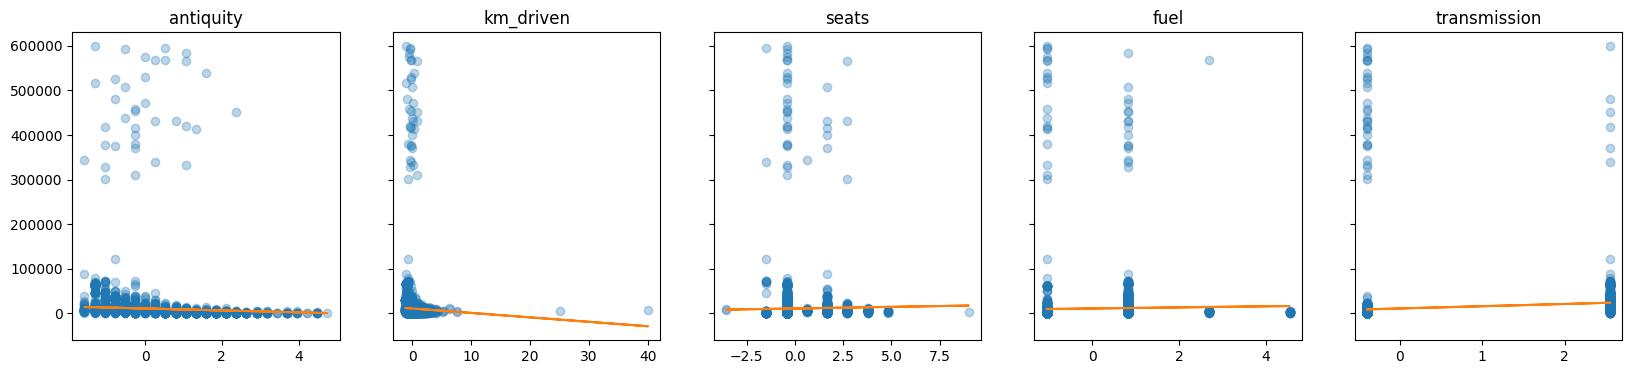

In [42]:
# Plot of the regression overlapped with the data in order to see if the regression has some relation with the data
f, axs = plt.subplots(1, len(features[:-1]), sharey = True, figsize = (20, 4))

for i in range(len(features[:-1])):
    col = features[i]
    x = x_train[col]
    m = regression.coef_[i]
    b = regression.intercept_
    axs[i].plot(x, y_train, 'o', alpha = 0.3)
    axs[i].plot(x, x * m + b)
    axs[i].set_title(col)

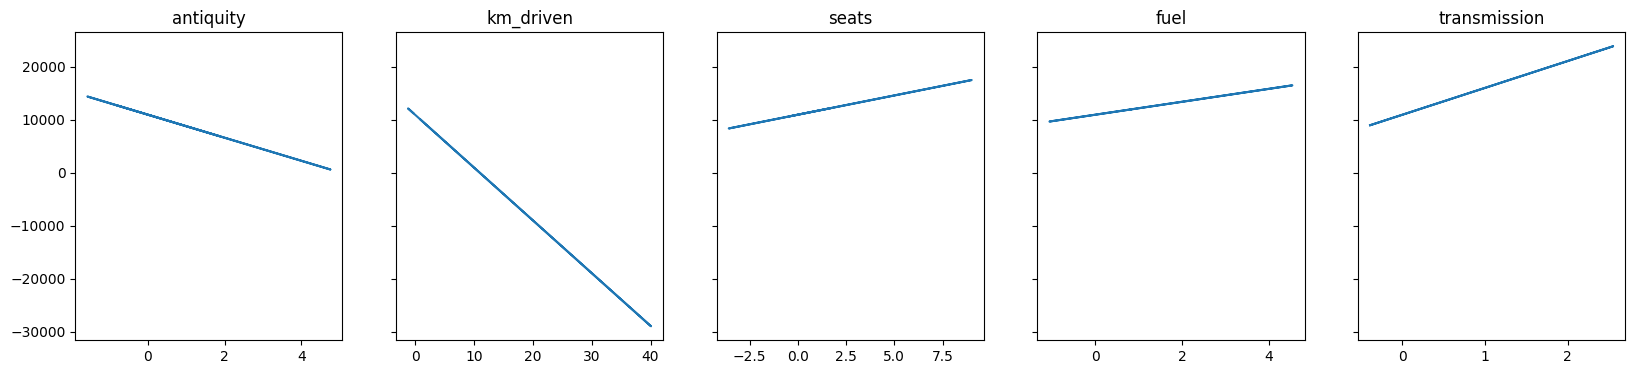

In [43]:
# Plot only the regression to see clearly how each attribute affects the regression line on a scale that is visibly understandable
f, axs = plt.subplots(1, len(features[:-1]), sharey = True, figsize = (20, 4))

for i in range(len(features[:-1])):
    col = features[i]
    x = x_train[col]
    m = regression.coef_[i]
    b = regression.intercept_
    axs[i].plot(x, x * m + b)
    axs[i].set_title(col)

In [44]:
# Comparing the real values with the predicted values with an difference percentage for each prediction

y_pred = regression.predict(x_test)

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df['Difference'] = df['Actual'] - df['Predicted']
df['Difference %'] = df['Difference'] / df['Actual'] * 100
df


,Actual,Predicted,Difference,Difference %
5930,5633.63,7141.375841,-1507.745841,-26.763310
2441,6057.67,9146.596377,-3088.926377,-50.991988
5028,9086.50,11484.340658,-2397.840658,-26.389046
1564,6663.44,10764.333424,-4100.893424,-61.543188
5213,9571.12,11413.869579,-1842.749579,-19.253228
...,...,...,...,...
5477,5451.90,12550.021488,-7098.121488,-130.195372
643,4240.37,9787.944510,-5547.574510,-130.827605
6643,4543.25,7422.733580,-2879.483580,-63.379378
2188,4834.02,11251.366078,-6417.346078,-132.753817


### 5. Validación del modelo
##### Se debe revisar que el error del modelo entrenado este cercano al error de los datos de prueba. Esto se hace para verificar que el modelo no tenga overfitting o underfitting ya que esto podria evitar que el modelo prediciera adecuadamente el "selling_price" de datos que nunca haya visto.

In [45]:
print('Mean Absolute Error Train:', mean_absolute_error(y_train, regression.predict(x_train)))
print('Mean Absolute Error Test:', mean_absolute_error(y_test, regression.predict(x_test)))

print('Root Mean Squared Error Train:', np.sqrt(mean_squared_error(y_train, regression.predict(x_train))))
print('Root Mean Squared Error Test:', np.sqrt(mean_squared_error(y_test, regression.predict(x_test))))

Mean Absolute Error Train: 8482.988867562579
Mean Absolute Error Test: 8569.891106196956
Root Mean Squared Error Train: 39370.73696219552
Root Mean Squared Error Test: 38302.450834119496


Podemos apreciar que nuestro error en las pruebas se acerca bastante al error del entrenamiento, y ademas es un error relativamente bajo, lo cual nos da un buen indicio de que nuestro modelo predice adecuadamente el "selling_price" de un carro 

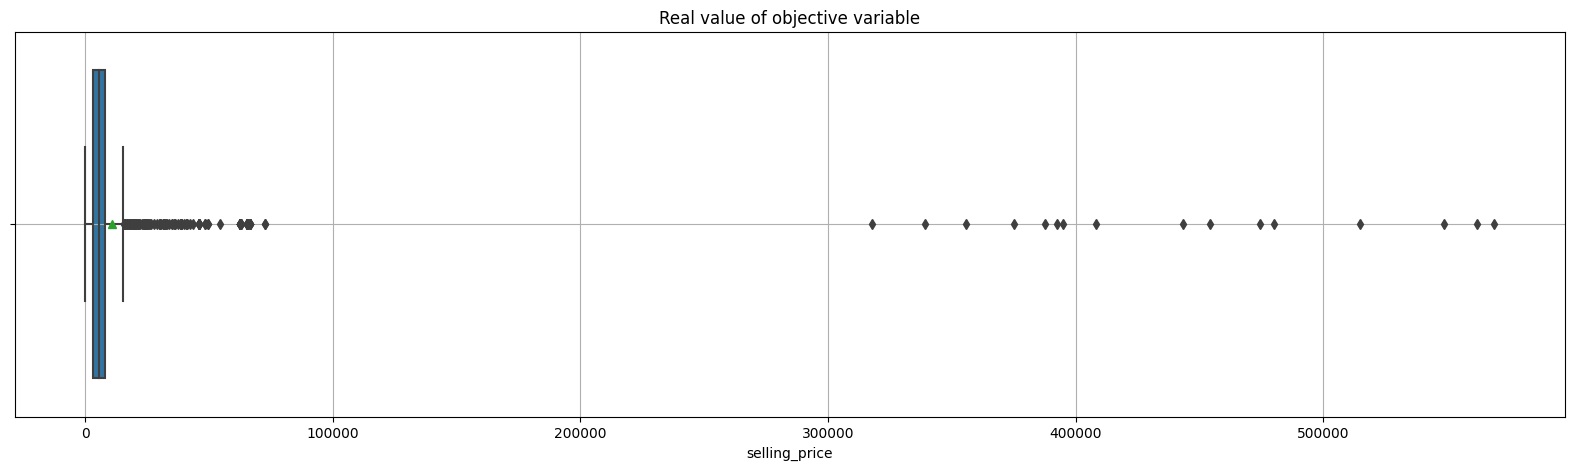

In [46]:
# Plot real value of objective variable on a boxplot

plt.figure(figsize=(20, 5))
sns.boxplot(x = y_test, showmeans = True)
plt.title('Real value of objective variable')
plt.grid()
plt.show()   

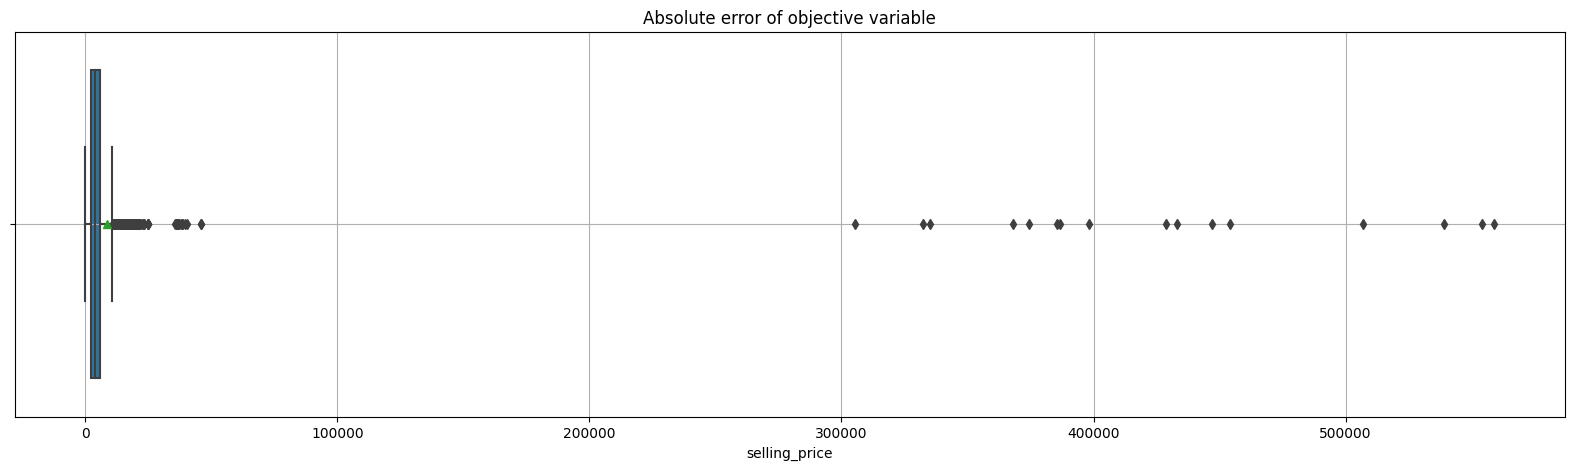

In [47]:
# Plot |real value - predicted value| of objective variable on a boxplot

plt.figure(figsize=(20, 5))
sns.boxplot(x = abs(y_test - regression.predict(x_test)), showmeans=True)
plt.title('Absolute error of objective variable')
plt.grid()
plt.show()

In [48]:
abs(y_test - regression.predict(x_test)).describe(percentiles = [0.25, 0.5, 0.75, 0.95, 0.99])

count      2135.000000
mean       8569.891106
std       37340.162942
min           0.999798
25%        2298.004680
50%        3898.805363
75%        5693.762621
95%       18346.409049
99%       38189.542532
max      559035.881180
Name: selling_price, dtype: float64

Creo que esto quiere decir que nuestros resultados son muy acercados. No se si esto puede ser un problema como de overfitting?

## 8. Exportación del modelo
##### Se debe exportar el modelo hecho anteriormente para poder enviarlo a MotorAlpes para que lo puedan correr

In [49]:
xa_train, xa_test, ya_train, ya_test = train_test_split(og_df, og_df['selling_price'], test_size = 0.3, random_state = 1)

In [50]:
xa_train

,year,km_driven,owner,seller_type,seats,fuel,transmission,mileage,engine,max_power,selling_price
1839,2007.0,120000.0,Third Owner,Individual,7.0,Diesel,Manual,13.60,2523.0,63.00,NaN
1019,2013.0,175000.0,Second Owner,Individual,5.0,Diesel,Manual,19.09,1396.0,69.00,2423.07
6009,2017.0,5000.0,First Owner,Individual,5.0,Petrol,Manual,25.17,799.0,53.30,3452.87
1891,2012.0,48000.0,First Owner,Individual,5.0,Petrol,Manual,20.92,998.0,67.10,3053.07
3477,2012.0,129000.0,Third Owner,Individual,7.0,Diesel,Manual,15.10,2179.0,140.00,7208.63
...,...,...,...,...,...,...,...,...,...,...,...
905,2013.0,70000.0,First Owner,Individual,5.0,Petrol,Manual,19.81,1086.0,68.05,3755.75
5192,2016.0,32000.0,First Owner,Dealer,5.0,Diesel,Manual,25.10,1248.0,88.50,8359.58
3980,2019.0,40000.0,First Owner,Individual,5.0,Diesel,Manual,25.60,1498.0,97.90,14538.41
235,2012.0,193000.0,First Owner,Individual,5.0,Diesel,Manual,19.30,1248.0,73.90,3876.91


In [51]:
ya_train

1839         NaN
1019     2423.07
6009     3452.87
1891     3053.07
3477     7208.63
          ...   
905      3755.75
5192     8359.58
3980    14538.41
235      3876.91
5157    12721.10
Name: selling_price, Length: 4980, dtype: float64

In [52]:
xa_test

,year,km_driven,owner,seller_type,seats,fuel,transmission,mileage,engine,max_power,selling_price
5930,2012.0,146000.0,Second Owner,Individual,5.0,Diesel,Manual,22.32,1582.0,126.32,5633.63
2441,2016.0,32000.0,First Owner,Individual,5.0,Petrol,Manual,20.40,1197.0,81.80,6057.67
5028,2014.0,50000.0,First Owner,Individual,7.0,Diesel,Manual,15.10,2179.0,140.00,9086.50
1564,2018.0,5000.0,First Owner,Individual,5.0,Petrol,Manual,22.00,1197.0,81.80,6663.44
5213,2016.0,120000.0,First Owner,Individual,7.0,Diesel,Manual,24.52,1248.0,88.50,9571.12
...,...,...,...,...,...,...,...,...,...,...,...
5477,2012.0,97000.0,Third Owner,Individual,5.0,LPG,Manual,26.60,1086.0,68.10,NaN
643,2014.0,60000.0,Second Owner,Individual,5.0,Diesel,Manual,20.14,1498.0,88.80,4240.37
6643,2011.0,97000.0,First Owner,Dealer,5.0,Diesel,Manual,25.20,1248.0,74.00,4543.25
2188,2019.0,10000.0,First Owner,Individual,5.0,Petrol,Manual,23.95,998.0,67.05,4834.02


In [53]:
ya_test

5930    5633.63
2441    6057.67
5028    9086.50
1564    6663.44
5213    9571.12
         ...   
5477        NaN
643     4240.37
6643    4543.25
2188    4834.02
4966     605.77
Name: selling_price, Length: 2135, dtype: float64

In [60]:
 class AntiquityTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.imputer = SimpleImputer(strategy='median')

    def fit(self, X, y=None):
        self.imputer.fit(X)
        return self

    def transform(self, X):
        X_imputed = self.imputer.transform(X)
        X['antiquity'] = 2020 - X['year']
        #df = pd.DataFrame(X_imputed, columns=X.columns)
        return X
    
class ColumnSelectorTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns=None):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.columns]
    
class CustomCategoricalTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, replace_dict):
        self.replace_dict = replace_dict

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X_copy = X.copy()
        X_copy = X_copy.replace(self.replace_dict)
        return X_copy

numeric_cols = ['year', 'km_driven', 'seats', 'max_power']
categorical_cols = ['fuel', 'transmission']
features = ["year", "km_driven", "seats", "max_power", "fuel", "transmission"]
drop_cols = ["owner", "year", "seller_type", "mileage", "engine"]

numeric_preprocessor = Pipeline([
    ('antiquity', AntiquityTransformer()),
    ('imputer', SimpleImputer(strategy="median")),
])

categorical_preprocessor = Pipeline([
    ('imputer', SimpleImputer(strategy="most_frequent")),
])


cat_transformer = Pipeline(steps=[
    ('cat_trans', CustomCategoricalTransformer({'fuel': {'Petrol': 1, 'Diesel': 2, 'CNG': 3, 'LPG': 4, 'Electric': 5},
                                                 'transmission': {'Manual': 1, 'Automatic': 2}
                                            }))])

drop_transformer = ColumnTransformer([('drop_cols', 'drop', drop_cols)])

preprocessor = ColumnTransformer(transformers=[
    ('cat', categorical_preprocessor, categorical_cols),
    #('replacer', cat_transformer, []),
    ('num', numeric_preprocessor, numeric_cols),
    ('drop', drop_transformer, drop_cols),
])

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),
    ('regression', LinearRegression())
])


pipeline.fit(xa_train, ya_train)

ValueError: could not convert string to float: 'Diesel'

##### Se debe revisar que el pipeline este funcionando bien

In [ ]:
ya_pred = pipeline.predict(xa_test)
test_df = pd.DataFrame({'Actual': ya_test, 'Predicted': ya_pred})

test_df['Difference'] = test_df['Actual'] - test_df['Predicted']
test_df['Difference %'] = test_df['Difference'] / test_df['Actual'] * 100
test_df.describe()

In [ ]:
print('Mean Absolute Error Train:', mean_absolute_error(ya_train, pipeline.predict(xa_train)))
print('Mean Absolute Error Test:', mean_absolute_error(ya_test, pipeline.predict(xa_test)))

In [ ]:
print('Root Mean Squared Error Train:', np.sqrt(mean_squared_error(ya_train, pipeline.predict(xa_train))))
print('Root Mean Squared Error Test:', np.sqrt(mean_squared_error(ya_test, pipeline.predict(xa_test))))

In [ ]:

abs(ya_test - pipeline.predict(xa_test)).describe(percentiles = [0.25, 0.5, 0.75, 0.95, 0.99])

In [ ]:
# Persiste the model
dump(pipeline, 'model.joblib')

### 9. Pruebas del Modelo
##### Se carga el pipeline para hacer pruebas sobre los datos de prueba que no tienen el valor de "selling_price"

In [ ]:
pipeline_loaded = load('model.joblib')

In [ ]:
df_new = pd.read_csv('./data/MotorAlpes_test.csv', index_col=False)
df_new = df_new.iloc[:, 1:]
df_new.describe()

In [ ]:
og_df.describe()

In [ ]:
df_new["selling_price"] = pipeline_loaded.predict(df_new)
df_new

In [ ]:
# Plot real value of objective variable on a boxplot

plt.figure(figsize=(20, 5))
sns.boxplot(x = df_new["selling_price"], showmeans = True)
plt.title('Real value of objective variable')
plt.grid()
plt.show() 